MSE-2

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:07:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


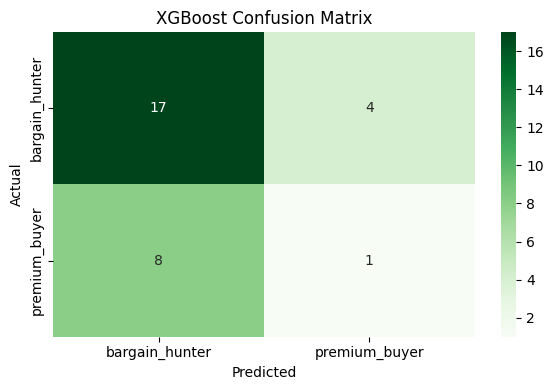

Accuracy: 0.6
Precision: 0.2
Recall: 0.11
ROC AUC: 0.48

Classification Report:
                 precision    recall  f1-score   support

bargain_hunter       0.68      0.81      0.74        21
 premium_buyer       0.20      0.11      0.14         9

      accuracy                           0.60        30
     macro avg       0.44      0.46      0.44        30
  weighted avg       0.54      0.60      0.56        30



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

# Step 1: Load the data
df = pd.read_csv("/content/customer_behavior.csv")  # Make sure this is in your working directory

# Step 2: Encode the target variable
le = LabelEncoder()
df['buyer_type_encoded'] = le.fit_transform(df['buyer_type'])  # bargain_hunter -> 0, premium_buyer -> 1

# Step 3: Select features and target
X = df[['total_spent', 'avg_purchase_value', 'visits_per_month']]
y = df['buyer_type_encoded']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 7: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred, target_names=le.classes_)

# Step 8: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()

# Step 9: Print evaluation resultsf
print("Accuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("ROC AUC:", round(roc_auc, 2))
print("\nClassification Report:\n", report)
